<a href="https://colab.research.google.com/github/campusplage/compte-rendus-jottras_juventin/blob/master/TP2_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Entrez ici vos noms et prénoms

# TP 2: Utiliser l'analyse en composantes principales de `scikit-learn`




---
Ce notebook contient votre compte-rendu pour le TP2.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.
  __La procédure à suivre sera la même pour tous les TP. Sa mise en œuvre correspond au quart de la note.__

## b. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## a. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
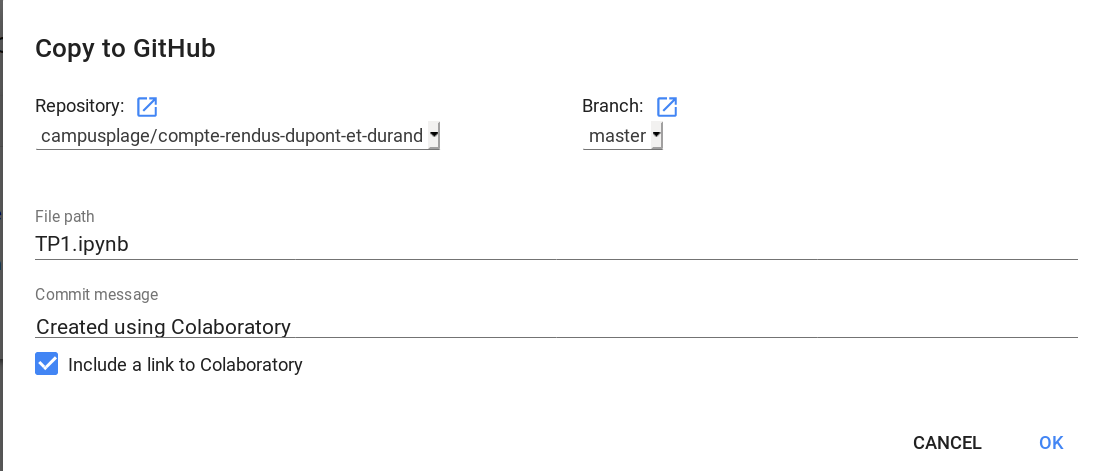

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 1. Charger et manipuler des données LFW (3 points)

## a. Téléchargement des données

Dans ce TP, nous allons travailler avec un autre ensemble de données provenant du challenge [_labeled faces in the wild_](http://vis-www.cs.umass.edu/lfw/). Il s'agit d'un ensemble de photos de visages en noir et blanc.

In [0]:
# différents imports utiles par la suite
import pandas
import sklearn
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Téléchargement des données
d = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

## b. Accès aux données

Dans la cellule précédente, nous avons téléchargé des données contenant un gros milliers d'images noires et blanc de visages d'hommes politiques.  

Ces données sont regroupées dans variable `data_dict`, qui est un _dictionnaire_ ([dict](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict)).

> Un dictionnaire est une structure de donnée qui permet de regrouper plusieurs valeurs hétérogènes, un peu à la manière d'une ligne donnée d'un `DataFrame` de pandas.
>
> Par exemple, on peut définir le dictionnaire suivant:
> ```python
student = {'name':'Dupont',
           'first name': 'Jean',
           'age': 23,
           'marks': [10, 13, 15.5, 11]
           }
  ```
> Il est constitué de 4 entrées appelées _clés_ (keys), qu'on peut lister par la méthode du même nom:
> ```python
  student.keys()
  ```  
> Et  on peut accéder à une entrée donnée par l'opérateur `[]` ou bien par `.`:
>```python
student['age']
student.age
```


In [188]:
## listez les clés de la variable `d`

d.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

## c. Manipulations élémentaires de `ndarrays`

Affichez le type de toutes les entrées de `d`

> utilisez les fonctions `print` et `type` dans une boucle `for`

In [189]:
## Votre travail ici

# On crée une boucle qui récupère le type de données de chaque clé
for i in d.keys() :
    print(str(i) + ' : ' + str(type(d[i])))

data : <class 'numpy.ndarray'>
images : <class 'numpy.ndarray'>
target : <class 'numpy.ndarray'>
target_names : <class 'numpy.ndarray'>
DESCR : <class 'str'>


Comme vous le voyez, les données sont des [`ndarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), la structure de base de la bibliothèque `numpy` qu'on a déja vue.

Cette structure très puissante de données numériques permet de facilement faire des calculs et accédez à des données.

In [190]:
## Affichez la dimension de d.images (utilisez la propriété `shape` des `ndarrays`)

# On affiche la dimension de d.images
d.images.shape

## (comme on le voit, c'est un tableau 3D.)

(1560, 50, 37)

In [191]:
## créez les variables nb_samples, height et width correspondantes
## (indice: testez d'abord `a, b, c = [1, 2, 3] )

# nb_samples, height, et width prennent chacune des 3 valeurs de d.images.shape
nb_samples, height, width = [d.images.shape[0], d.images.shape[1], d.images.shape[2]]
print("nb_samples = {}".format(nb_samples))
print("height = {}".format(height))
print("width = {}".format(width))

nb_samples = 1560
height = 50
width = 37


Comme vous le constatez, `d.images` regroupe $1560$ images, chacune étant de dimensions $50\times 37=1850$ pixels.

In [192]:
## chaque ligne de `d.data` n'est rien d'autre que la version aplatie de l'image
## correspondante dans `d.images`. 
print('Are d.data[10] and d.images[10].flatten() the same ?',
      np.allclose(d.data[10], d.images[10].flatten()))
## (où on a rencontré la fonction `allclose` de numpy qui compare des `ndarray`
## et la méthode `flatten` qui applatie un `ndarray`)


## en fait, on aurait pu construire cette version applatie très simplement, avec 
## la méthode `reshape` des `ndarray`:
flattened =  d.images.reshape((nb_samples, height * width))
print('Is `flattened` equal to `d.data` ? ', 
      np.allclose(flattened, d.data))

Are d.data[10] and d.images[10].flatten() the same ? True
Is `flattened` equal to `d.data` ?  True


In [193]:
## Pour extraire les 10 premières images, il suffit de faire:
d.data[:10]

## Pour extraire les pixels 50...99 des 10 premières images:
d.data[:10, 50:100]
## Il s'agit d'une sélection dans la ndarray `data`. C'est elle même une ndarray.
print(d.data[:10, 50:100].shape)

(10, 50)


Maintenant, voyons quel est le nom des personnes dans les $10$ premières images.

In [194]:
## Première solution: commentez chaque ligne

# On crée une boucle qui va de 0 à 9 inclus
for index in range(10):
  # On affiche le nom de l'image associée à l'indice 'index'
  print(d.target_names[d.target[index]])

Tony Blair
Gerhard Schroeder
Donald Rumsfeld
George W Bush
George W Bush
Colin Powell
Ariel Sharon
George W Bush
Colin Powell
George W Bush


In [195]:
## Deuxième solution: supprimez la boucle, et affichez ces 10 premières `target` directement
## (indice: utilisez [] deux fois, de manière imbriquée)

# On affiche tous les noms des images dont les indices sont situés entre 0 et 9.
d.target_names[d.target[:10]]

array(['Tony Blair', 'Gerhard Schroeder', 'Donald Rumsfeld',
       'George W Bush', 'George W Bush', 'Colin Powell', 'Ariel Sharon',
       'George W Bush', 'Colin Powell', 'George W Bush'], dtype='<U17')

## b. Affichage 


Nous définissons maintenant deux fonctions utilitaires:
* `plot_images` qui prend en entrée: des images sous forme de lignes, un titre à indiquer pour la figure, et qui se charge d'un affichage
* `shuffle` mélange un lot d'images. C'est utile pour ne pas tout le temps afficher les mêmes premières si on n'a pas envie

In [0]:
#fonction utilitaire pour réorganiser aléatoirement des images
def shuffle(images):
  result = images.copy()
  np.random.shuffle(result)
  return result

# définition d'une fonction d'affichage
def plot_images(images, title='', n_row=3, n_col=4, shuffle=True):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row+0.5))
    plt.suptitle(title)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.95, hspace=0, wspace=0)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

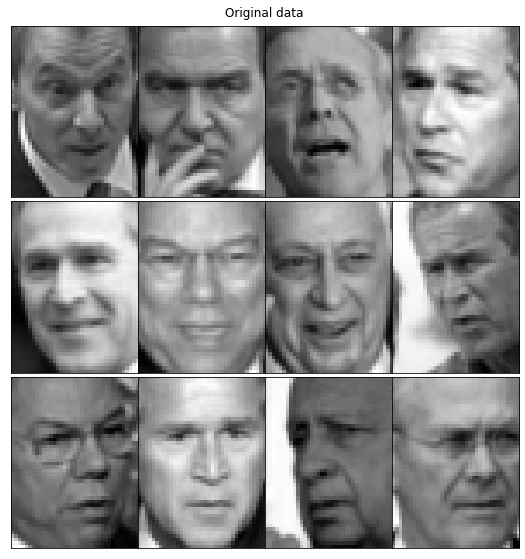

In [197]:
# Affichons les premières images
plot_images(d.data, 'Original data')

In [198]:
# On crée une boucle qui parcoure chaque nom de cible et leur indice
for (i, name) in enumerate(d.target_names):
  # On affiche l'indice, le nomn et le nombre d'occurences 
  print('target %d, name: %s, number of matches: %d' % (i, name, np.sum(d.target == i)))

target 0, name: Ariel Sharon, number of matches: 77
target 1, name: Colin Powell, number of matches: 236
target 2, name: Donald Rumsfeld, number of matches: 121
target 3, name: George W Bush, number of matches: 530
target 4, name: Gerhard Schroeder, number of matches: 109
target 5, name: Hugo Chavez, number of matches: 71
target 6, name: Jacques Chirac, number of matches: 52
target 7, name: Jean Chretien, number of matches: 55
target 8, name: John Ashcroft, number of matches: 53
target 9, name: Junichiro Koizumi, number of matches: 60
target 10, name: Serena Williams, number of matches: 52
target 11, name: Tony Blair, number of matches: 144


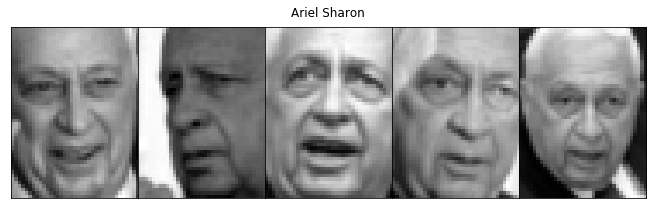

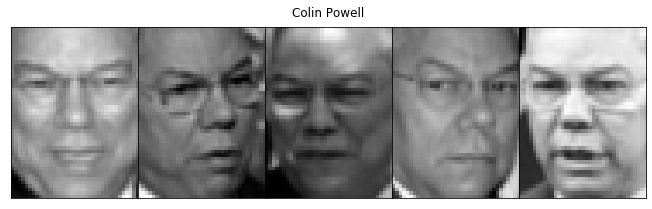

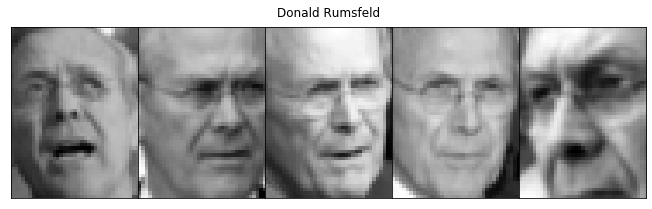

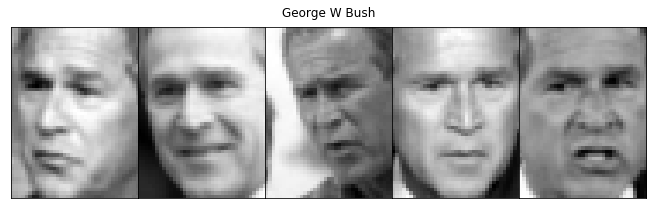

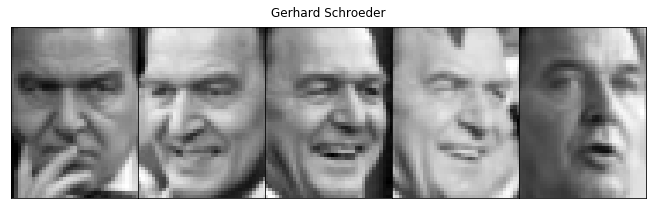

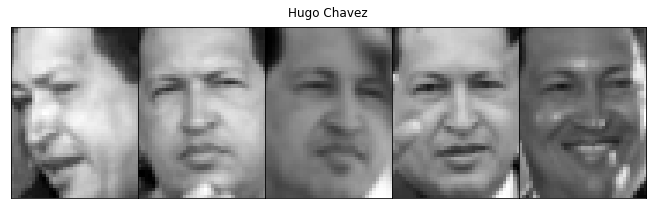

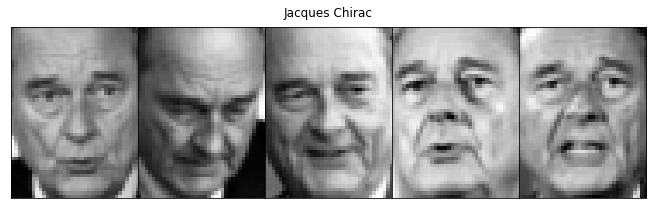

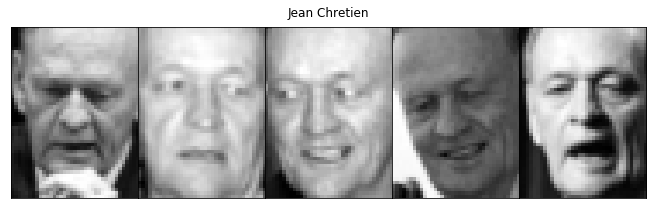

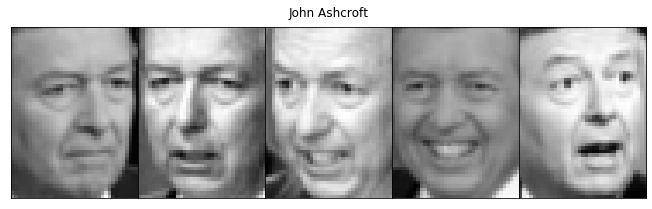

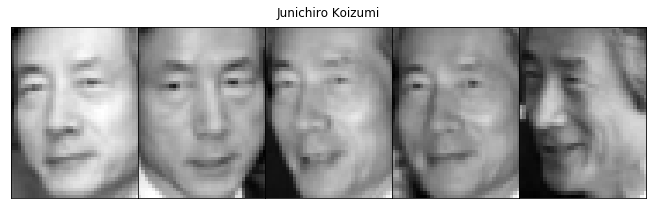

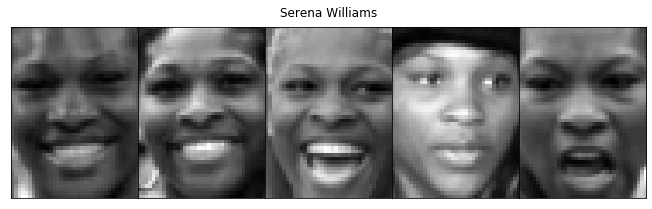

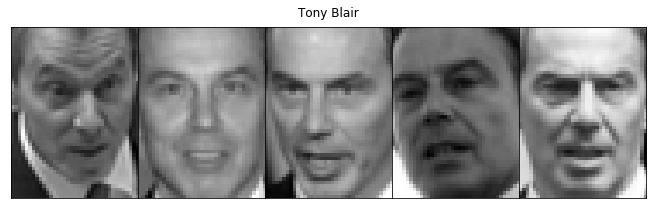

In [199]:
## Corsons un peu le problème:
## Pour chaque personnalité, affichez 5 photos de la base prises au hasard

# On crée une boucle qui parcoure chaque target_name et renvoie son nom et son indice
for (i, name) in enumerate(d.target_names):
    # On affiche les images dont l'indice correspond à l'indice de target_name
    plot_images(d.data[d.target == i], name, n_row = 1, n_col = 5)

# Exploitation simple d'une ACP (5 points)

## a. Apprentissage et reconstruction 

Dans les cellules suivantes, vous allez calculer une ACP sur ces données d'images.

Attention à la normalisation. Vous pouvez soit effectuer cette normalisation à la main, soit explorer un peu [la doc de sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

$\Rightarrow$ Appelez `data_pca` les données en basse dimension  
$\Rightarrow$ Appelez `reconstruction` le résultat de la fonction `pca.inverse_transform` appliqué à `data_pca`. De quoi s'agit-il ? Affichez le

In [219]:
## Créez l'objet pca, et entrainez le sur les données...

# On initialise une acp avec 2 dimensions
pca = PCA(n_components=6, whiten=True)

# On l'entraîne sur nos données
pca.fit(d.data)

## Calculez la transformée des images par ACP

# On applique l'ACP à nos données
images_transformed = pca.transform(d.data)

# On vérifie que nos données aient bien six dimensions
print('Dimension initiale des données : ', d.data.shape)
print('          après ACP            : ', images_transformed.shape)

# On crée le dataframe des valeurs transformées
pca_names = ['composante %d' % d for d in range(6)]
data_pca = pandas.DataFrame(images_transformed, 
                            index=d.target,
                            columns=pca_names)

## calculez la reconstruction correspondante
# On applique un inverse_transform sur nos images transformées
data_reco = pca.inverse_transform(images_transformed) 
print('     après reconstruction      : ', data_reco.shape)

data_pca.head()

Dimension initiale des données :  (1560, 1850)
          après ACP            :  (1560, 6)
     après reconstruction      :  (1560, 1850)


,composante 0,composante 1,composante 2,composante 3,composante 4,composante 5
11,1.825281,-0.069068,-0.150551,0.398275,-1.548739,-0.108753
4,1.132443,-0.937125,0.912758,0.752717,-1.024075,-0.956242
2,0.041313,-1.872513,0.422004,0.729406,0.383682,0.221033
3,-0.571144,-0.086107,0.129031,1.101853,0.479196,-0.507511
3,-0.952595,-2.641469,0.277228,-1.924956,0.706615,0.242806


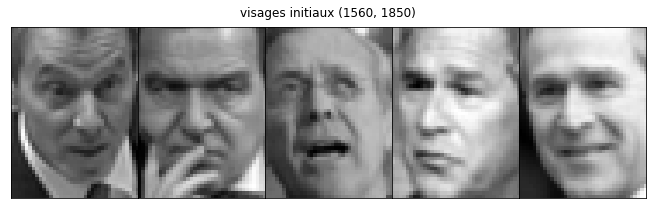

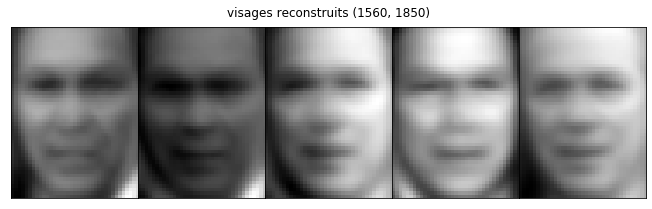

In [220]:
## Affichez sur une ligne les 5 premières images originales
plot_images(d.data, 'visages initiaux ' + str(d.data.shape), n_row=1, n_col=5)

## Affichez sur une ligne leur reconstruction, en indiquant le nombre de composantes dans le titre
plot_images(data_reco, 'visages reconstruits ' + str(data_reco.shape), n_row=1, n_col=5)
# L'ordre des images initiales et reconstruites est différent

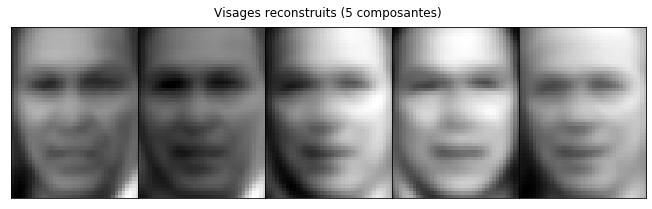

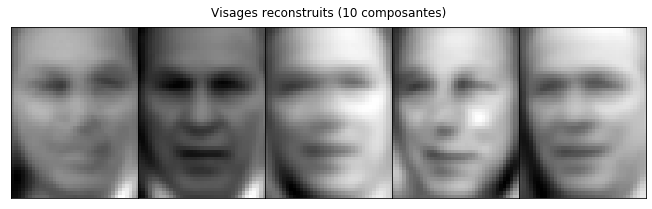

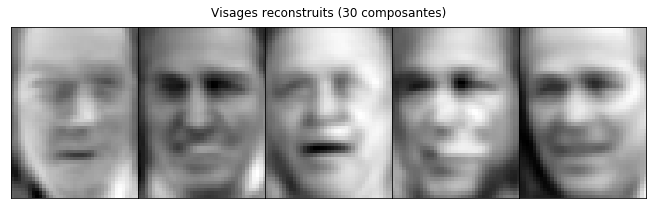

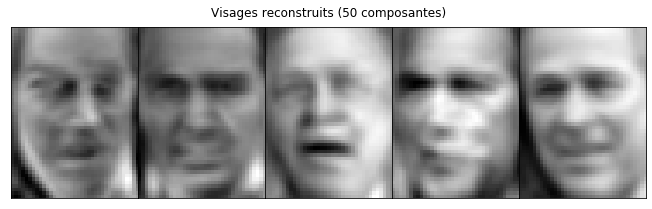

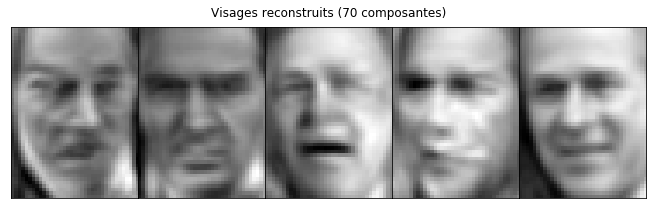

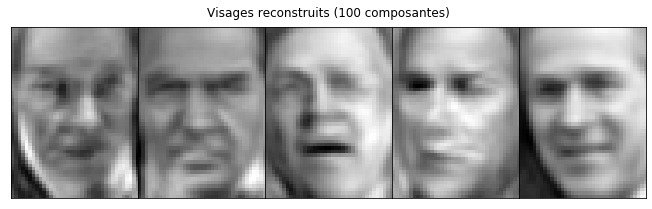

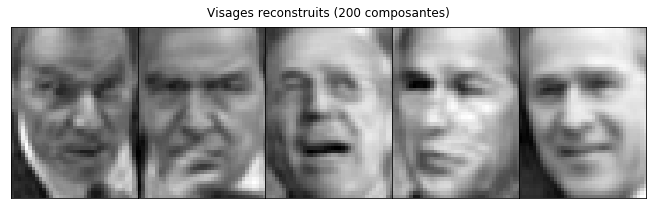

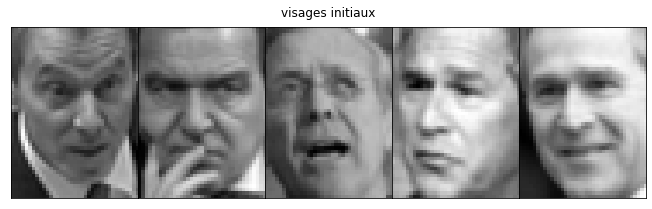

In [210]:
## Maintenant, pour les nombres de composantes suivants: 5, 10, 30, 50, 70, 100, 200, affichez les visages reconstruits sur une ligne
## puis les visages initiaux sur une ligne.
## Indice: vous avez deux options: réapprendre une ACP à chaque fois, ou bien réutiliser la même plusieurs fois.

# Dans une boucle, on affiche chaque reconstruction d'une PCA de ncomp composantes
for ncomp in [5, 10, 30, 50, 70, 100, 200]:
  data_pca = PCA(n_components=ncomp, whiten=True)
  data_pca.fit(d.data)
  data_transformed = data_pca.transform(d.data)
  reconstruction = data_pca.inverse_transform(data_transformed) 
  plot_images(reconstruction, title=f'Visages reconstruits ({ncomp} composantes)', n_row=1, n_col=5)
  
# Affichez sur une ligne les 5 premières images originales
plot_images(d.data, 'visages initiaux', n_row=1, n_col=5)


## b. Affichages par scores

Voyons si le score donné par l'ACP de `scikit-learn` peut être interprétable.

> Affichez les $10$ échantillons avec le meilleur score et les $10$ avec les pires scores. Interprétez  

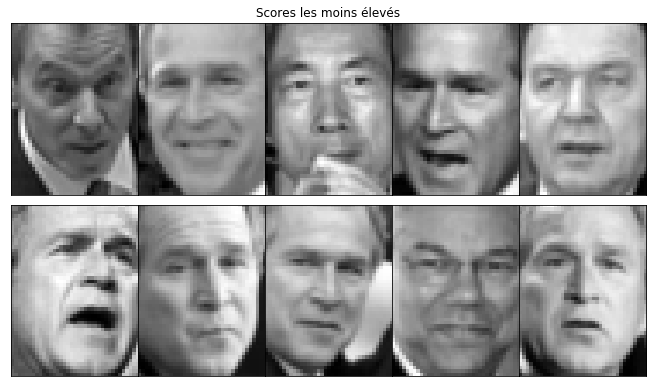

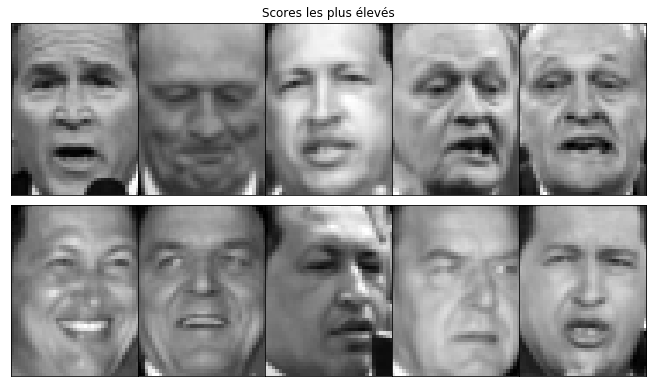

In [226]:
##extraction et tri des scores
# On prend les scores samples des images
score=pca.score_samples(d.data) 
# On trie les index par score décroissant
score_index = np.argsort(score)

## Affichage des 10 images avec le score le plus faible, et celles avec le score le plus élevé
plot_images(d.data[score_index[:10]], title='Scores les moins élevés', n_row=2, n_col=5)
plot_images(d.data[score_index[-10:]], title='Scores les plus élevés', n_row=2, n_col=5)

__Interprétation__  
...

## b. Interprétation et discussion

Dans cette section, vous allez étudier certains paramètres appris par l'ACP, les afficher, et créer une cellule de texte où vous donnerez une discussion courte de ce qui vous semble pertinent.

> * Pour les affichages:  
>   $\Rightarrow$ utilisez `plt.plot`, `plt.grid`  
>   $\Rightarrow$ mettez des titres, nommez les axes
> * Pour les discussions:
>   concentrez vous sur l'essentiel: je ne noterai __PAS__ la quantité.

### `pca.explained_variance_ratio`

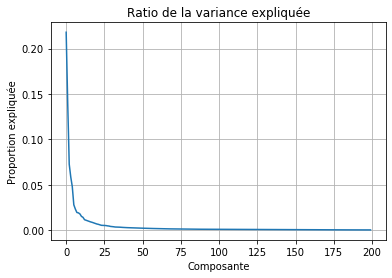

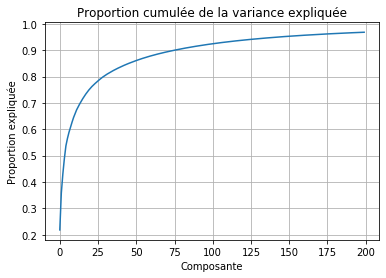

In [0]:
## Affichage de pca.explained_variance_ratio_, ainsi que de pca.explained_variance_ratio_.cumsum()

# On crée le premier plot sur la variance expliquée.
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.title('Ratio de la variance expliquée') #On choisit un titre
plt.xlabel('Composante') #On choisit un titre d'axe X
plt.ylabel('Proportion expliquée') #On choisit un titre d'axe Y
plt.grid() #On affiche la grille

# On crée le second plot sur la variance expliquée cumulée
plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Proportion cumulée de la variance expliquée')
plt.xlabel('Composante')
plt.ylabel('Proportion expliquée')
plt.grid()

__De quoi s'agit-il ?__  
Il s'agit de la courbe de ratio de la variance expliquée et de proportion de la variance expliquée cumulée.

__Interprétez__  
Le coude se fait au niveau de la 10 ou 15ème composante. On pourrait donc réduire le modèle à 15 ou 20 composantes pour le simplifier tout en conservant de bonens performances.

### `pca.components_`

In [0]:
## Commencez par en affichez la dimension
# On affiche la méthode shape de pca.components_
print(pca.components_.shape)

## Cela devrait vous rappeler quelque chose. Affichez.
# Le 200 correspond au nombre de dimensions de notre dernière pca
print(images_transformed.shape[1])
# LE 1850 correspond au nombre de dimensions des images initiales
print(d.data.shape[1])

(200, 1850)
200
1850


__De quoi s'agit-il ?__  
Il s'agit de la dimension des composantes de l'ACP.

__Interprétez__  
Cette dimension correspond à la dimension de notre dernière PCA et au nombre de dimensions des images initales.

# Analyses des précipitations en France (7 points)

Dans cette section, nous allons appliquer une ACP aux données de précipitations dans les grandes villes de France, déjà vues lors du premier TP. Il s'agit de rajouter l'ACP à l'arsenal d'outils de visualisation que nous avons vus. 

In [0]:
# imports
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Chargeons les données
raw_data = pandas.read_csv('https://husson.github.io/img/pluie.csv',
                       encoding = "ISO-8859-1", sep=';')

# renommons la première colonne "Ville"
raw_data = raw_data.rename(columns = {raw_data.columns[0]:'Ville'})

# choisissons cette colonne en index
raw_data = raw_data.set_index('Ville')

In [0]:
raw_data.head()

,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,NOVEMBREp,DECEMBREp,Précipitations annuelles,JANVIERnb.j.pl,FEVRIERnb.j.pl,MARSnb.j.pl,AVRILnb.j.pl,MAInb.j.pl,JUINnb.j.pl,JUILLETnb.j.pl,AOUTnb.j.pl,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Latitude,Longitude,Précipitations de mai à aout,Précipitations sept-oct,Géographie
Ville,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0,653.0,12.0,10.0,9.0,9.0,8.0,4.0,1.0,2.0,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,41.55,8.44,13.9,25.8,Sud
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0,690.0,16.0,13.0,12.0,12.0,13.0,10.0,11.0,11.0,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,47.28,-0.33,29.0,30.8,Ouest
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0,826.0,16.0,14.0,13.0,12.0,14.0,11.0,12.0,12.0,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,45.39,0.09,29.9,31.0,Ouest
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0,1088.0,17.0,14.0,12.0,14.0,14.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,47.15,6.02,35.8,35.5,Est
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0,1474.0,16.0,14.0,13.0,15.0,17.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,43.29,-1.34,26.0,36.8,Ouest


## a. Utilisation simple ACP

Pour la suite:
1. Affichez une ACP des données de précipitations en 2D (deux composantes), avec pour chaque ville:
   * Son nom
   * La taille du point dépendant du volume total de précipitations
   * La couleur du point dépendant de la région.
2. Affichez une ACP du nombre de jours de pluie, calculée sur les colonnes (donc les mois), avec le nom des mois et la taille des points dépendants du nombre de jours de pluie moyen par mois. 

## ACP des précipitations par ville

In [0]:
# On prépare les données
pcadata = raw_data.T[:12].T
print('forme de pcadata : {} \n'.format(pcadata.shape))
pcadata.head()

forme de pcadata : (34, 12) 



,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,NOVEMBREp,DECEMBREp
Ville,,,,,,,,,,,,
Ajaccio,78,69,51,39,43,23,10,15,43,81,105,96
Angers,65,50,60,45,50,55,35,60,55,65,80,70
Angoulème,79,68,64,62,70,58,53,66,69,70,79,88
Besançon,94,87,75,74,86,107,80,116,106,78,92,93
Biarritz,128,105,98,102,100,91,69,123,155,152,175,176


In [0]:
# On initialise une acp avec 2 dimensions
pca = PCA(n_components=2, whiten=True)

# On l'entraîne sur nos données
pca.fit(pcadata)

# On applique l'ACP à nos données
x_transformed = pca.transform(pcadata)

# On vérifie que nos données aient bien deux dimensions
print('Dimension initiale des données : ', pcadata.shape)
print('          après ACP            : ', x_transformed.shape)

Dimension initiale des données :  (34, 12)
          après ACP            :  (34, 2)


In [0]:
# On prépare data_pca
pca_names = ['composante %d' % d for d in range(2)]
data_pca = pandas.DataFrame(x_transformed, 
                            index=pcadata.index,
                            columns=pca_names)

# On ajoute l'info de région et de précipitations des données initiales
data_pca['Région'] = raw_data['Géographie']
data_pca['Précipitations'] = raw_data['Précipitations annuelles']

data_pca.head()

,composante 0,composante 1,Région,Précipitations
Ville,,,,
Ajaccio,0.018751,2.145552,Sud,653.0
Angers,-0.308886,0.327198,Ouest,690.0
Angoulème,0.255218,-0.166498,Ouest,826.0
Besançon,1.166623,-1.953543,Est,1088.0
Biarritz,3.643434,-0.797352,Ouest,1474.0


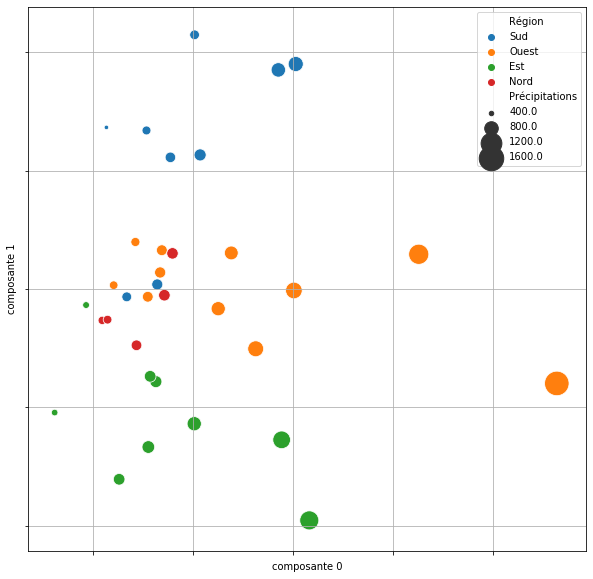

In [0]:
# On affiche le graph avec la composante 0 en x, la composante 1 en y,
# le volume total des précipitations en taille, et la région en couleur
g = sns.scatterplot(x='composante 0',
                    y='composante 1',
                    data=data_pca,
                    hue='Région',
                    size='Précipitations',
                    sizes=(20,600))

# On supprime les indications sur les axes
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.grid()

# On agrandit la figure
plt.gcf().set_size_inches(10,10)

##ACP du nombre de jours de pluie par mois

In [0]:
# On prépare les données
pcadata2 = raw_data.T[13:25]
print('forme de pcadata : {} \n'.format(pcadata2.shape))
pcadata2.head()

forme de pcadata : (12, 34) 



Ville,Ajaccio,Angers,Angoulème,Besançon,Biarritz,Bordeaux,Brest,Caen,Clermont-Fd,Dijon,Embrun,Grenoble,Lille,Limoges,Lyon,Marseille,Montpellier,Nancy,Nantes,Nice,Nîmes,Orléans,Paris,Perpignan,Poitiers,Reims,Rennes,Rouen,St-Quentin,Strasbourg,Toulon,Toulouse,Tours,Vichy
JANVIERnb.j.pl,12,16,16,17,16,16,22,17,12,16,9,14,18,17,15,8,8,16,18,9,8,16,17,7,16,17,18,17,17,15,9,14,16,17
FEVRIERnb.j.pl,10,13,14,14,14,13,16,14,11,13,9,11,14,14,12,6,6,13,14,7,6,13,14,6,13,15,14,15,14,13,6,12,13,14
MARSnb.j.pl,9,12,13,12,13,13,15,12,9,10,8,11,13,13,11,7,8,12,14,8,9,12,12,8,13,12,14,12,12,12,8,11,12,12
AVRILnb.j.pl,9,12,12,14,15,13,15,13,12,11,9,12,14,13,11,6,8,13,11,9,8,12,13,7,12,13,12,12,12,13,7,12,12,13
MAInb.j.pl,8,13,14,14,17,14,14,14,12,12,11,14,13,14,13,7,9,13,13,8,9,13,12,9,14,13,13,13,12,13,7,13,13,14


In [0]:
# On initialise une acp avec 2 dimensions
pca2 = PCA(n_components=2, whiten=True)

# On l'entraîne sur nos données
pca2.fit(pcadata2)

# On applique l'ACP à nos données
x_transformed2 = pca2.transform(pcadata2)

# On vérifie que nos données aient bien deux dimensions
print('Dimension initiale des données : ', pcadata2.shape)
print('          après ACP            : ', x_transformed2.shape)

Dimension initiale des données :  (12, 34)
          après ACP            :  (12, 2)


In [0]:
# On prépare data_pca
data_pca2 = pandas.DataFrame(x_transformed2, 
                            index=pcadata2.index,
                            columns=pca_names)

# On ajoute l'info des pluies des données initiales
data_pca2['Pluies'] = pcadata2.mean(axis = 1)

data_pca2.head()

,composante 0,composante 1,Pluies
JANVIERnb.j.pl,1.566346,1.412071,14.588235
FEVRIERnb.j.pl,0.027338,0.368307,11.941176
MARSnb.j.pl,-0.325223,-1.423169,11.235294
AVRILnb.j.pl,-0.311054,-1.139816,11.470588
MAInb.j.pl,0.025295,-1.216083,12.205882


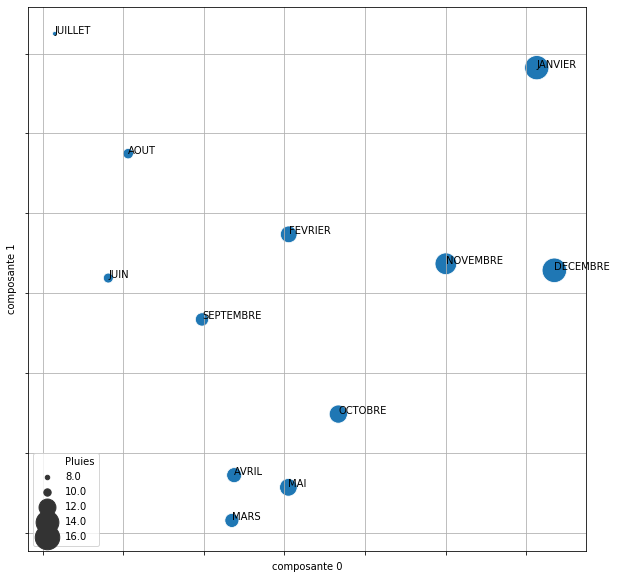

In [0]:
# On affiche le graph avec la composante 0 en x, la composante 1 en y,
# et le nombre moyen de jours de pluie en taille (de 20 à 600).
g = sns.scatterplot(x='composante 0',
                    y='composante 1',
                    data=data_pca2,
                    size='Pluies',
                    sizes=(20,600))

# On supprime les indications sur les axes
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.grid()

# On ajoute les noms
for i, (text_x,text_y) in enumerate(data_pca2.iloc[:,:2].to_numpy()):
  plt.annotate(data_pca2.index[i][:-7], (text_x,text_y))
  
# On agrandit la figure
plt.gcf().set_size_inches(10,10)